# Classificação de faces - UTKFace


## 1. Importação das bibliotecas

In [13]:
import glob
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import Model
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
# Verificando uso da GPU
print(tf.test.is_gpu_available())
print(tf.test.is_built_with_cuda()) 

True
True


## 2. Criação do dataframe com os dados

In [14]:
# Criando lista com os nomes das imagens
pasta_dados = "UTKFace/"
nome_imagens = [os.path.basename(file) for file in glob.glob(os.path.join(pasta_dados, '*.jpg'))]
print(f"Quantidade de imagens: {len(nome_imagens)}")

Quantidade de imagens: 24105


In [8]:
df = pd.DataFrame(columns=['imagem', 'idade', 'genero', 'raca', 'id_genero', 'id_raca'])
dic_genero = {0:'Masculino', 1: 'Feminino'}
dic_raca = {0: 'Branco', 1: 'Negro', 2: 'Asiático', 3: 'Indiano', 4: 'Outros'}

for nome in nome_imagens:
    
    idade = int(nome.rsplit('_', 1)[0].rsplit('_')[0])
    genero = int(nome.rsplit('_', 1)[0].rsplit('_')[1])
    raca = int(nome.rsplit('_', 1)[0].rsplit('_')[2])
    nome_imagem = pasta_dados + nome
    
    dic = {'imagem':nome_imagem, 'idade': idade, 'id_genero': genero, 'id_raca':raca, 'raca':dic_raca[raca],
           'genero': dic_genero[genero]}
    df_nome = pd.DataFrame([dic])
    df = pd.concat([df, df_nome], ignore_index=True)
    

In [9]:
df

,imagem,idade,genero,raca,id_genero,id_raca
0,UTKFace/100_0_0_20170112213500903.jpg,100,Masculino,Branco,0,0
1,UTKFace/100_0_0_20170112215240346.jpg,100,Masculino,Branco,0,0
2,UTKFace/100_1_0_20170110183726390.jpg,100,Feminino,Branco,1,0
3,UTKFace/100_1_0_20170112213001988.jpg,100,Feminino,Branco,1,0
4,UTKFace/100_1_0_20170112213303693.jpg,100,Feminino,Branco,1,0
...,...,...,...,...,...,...
24100,UTKFace/9_1_3_20161220222856346.jpg,9,Feminino,Indiano,1,3
24101,UTKFace/9_1_3_20170104222949455.jpg,9,Feminino,Indiano,1,3
24102,UTKFace/9_1_4_20170103200637399.jpg,9,Feminino,Outros,1,4
24103,UTKFace/9_1_4_20170103200814791.jpg,9,Feminino,Outros,1,4


## 3. Análise dos dados 

### - Quantidade de amostras por idade

In [15]:
pd.set_option('display.max_rows', None)
df.groupby('idade').count()

,imagem,genero,raca,id_genero,id_raca
idade,,,,,
1,1282,1282,1282,1282,1282
2,531,531,531,531,531
3,308,308,308,308,308
4,283,283,283,283,283
5,209,209,209,209,209
6,134,134,134,134,134
7,143,143,143,143,143
8,272,272,272,272,272
9,172,172,172,172,172


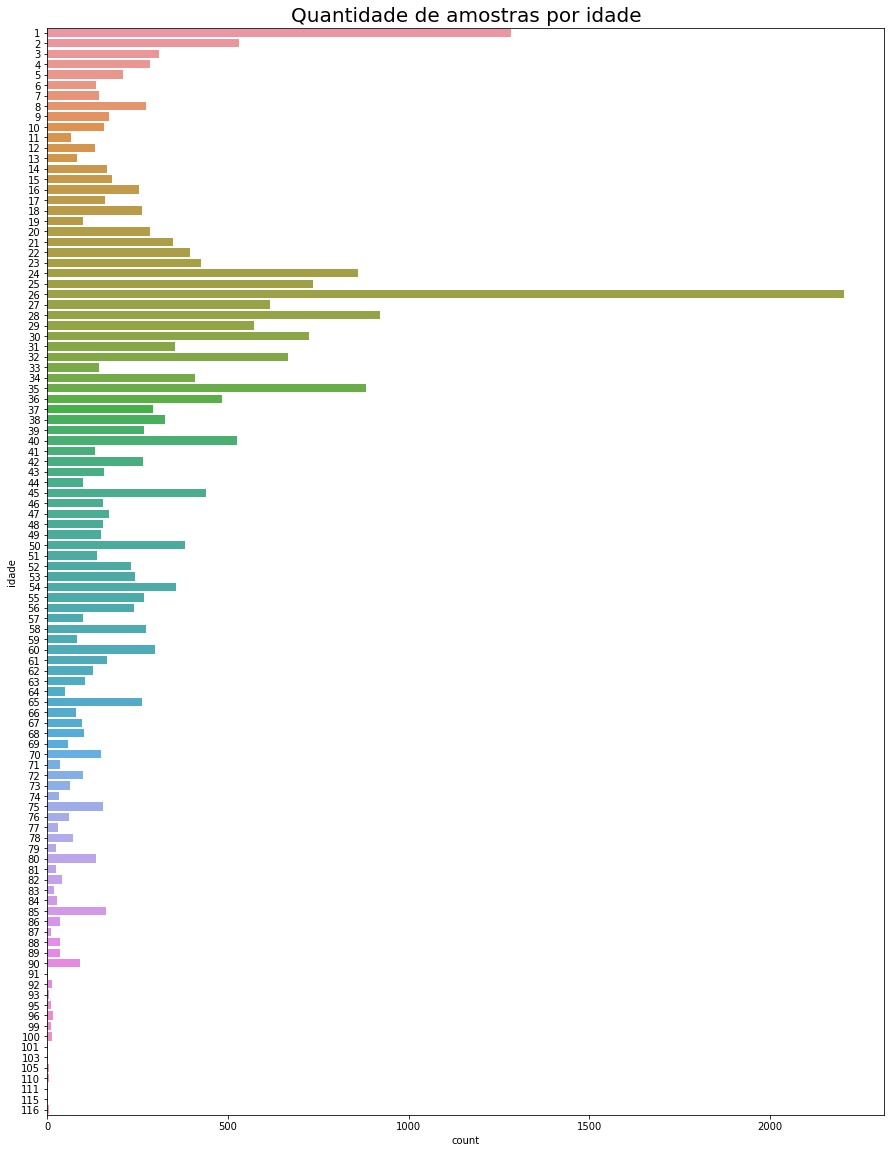

In [8]:
plt.figure(figsize=(15,20))
ax = sns.countplot(y="idade", data=df).set_title("Quantidade de amostras por idade",fontsize = 20)

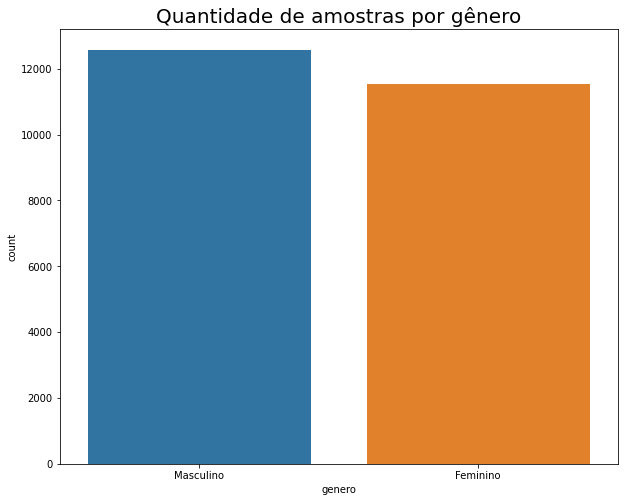

In [9]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="genero", data=df).set_title("Quantidade de amostras por gênero",fontsize = 20)

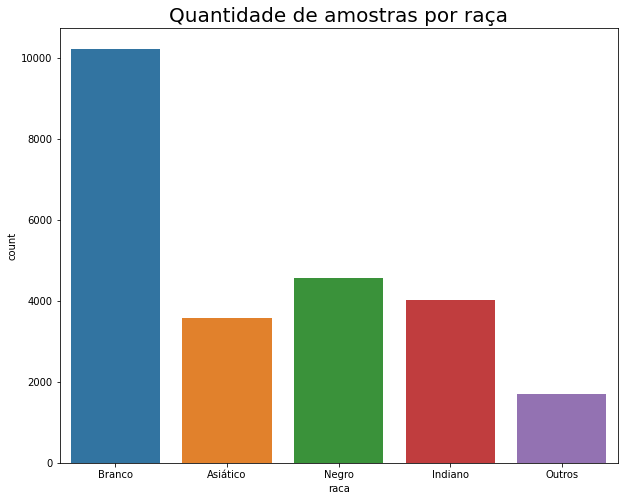

In [10]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="raca", data=df).set_title("Quantidade de amostras por raça",fontsize = 20)


<AxesSubplot:xlabel='genero', ylabel='idade'>

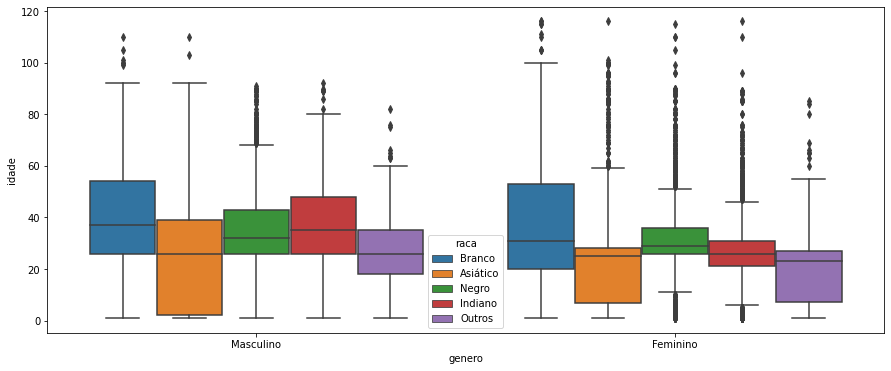

In [11]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='genero', y='idade', hue='raca')

## 4. Preparação dos dados para treinamento e teste do modelo

###  - Será utilizado amostras das idades de 1 até 80 anos

In [12]:
df = df[(df['idade'] >= 1) & (df['idade'] <= 80)]

### 4.1 Separando treino, teste e validação

In [15]:
p = np.random.permutation(len(df))
quantidade_treino = int(len(df) * 0.7)
indices_treino = p[:quantidade_treino]
indices_teste = p[quantidade_treino:]

# separando treino em treino e validação
treino = int(quantidade_treino * 0.7)
indices_treino, indices_val = indices_treino[:treino], indices_treino[treino:]

len(indices_treino), len(indices_val), len(indices_teste)

(11534, 4944, 7062)

### 4.2 Gerando dados para treinamento e validação

In [16]:
idade_max = df['idade'].max()

def gerador_dados(df, indices, treinamento, batch_size):
    imagens, idades, racas, generos = [], [], [], []
    while True:
        for i in indices:
            a = df.iloc[i]
            imagem, idade, raca, genero = a['imagem'], a['idade'], a['id_raca'], a['id_genero']
            img = load_img(imagem)
            img = tf.image.resize_with_pad(img_to_array(img, dtype = 'uint8'), *(200, 200)).numpy().astype('uint8')
            img = img / 255.0
            imagens.append(img)
            idades.append(idade / idade_max)
            racas.append(to_categorical(raca, 5))
            generos.append(to_categorical(genero, 2))
            if len(imagens) >= batch_size:
                yield np.array(imagens), [np.array(idades), np.array(racas), np.array(generos)]
                imagens, idades, racas, generos = [], [], [], []
        if not treinamento:
            break


In [17]:
batch_size = 64
valid_batch_size = 64
train_gen = gerador_dados(df, indices_treino, treinamento=True, batch_size=batch_size)
valid_gen = gerador_dados(df, indices_val, treinamento=True, batch_size=valid_batch_size)

## 5. Arquitetura da rede CNN

In [19]:
inp = Input(shape = (200,200,3))
x = Conv2D(32, 5, activation='relu')(inp) 
x = Conv2D(32, 5, activation='relu')(x) 
x = MaxPooling2D(pool_size = (2, 2))(x)

x = Conv2D(64, 5, activation='relu')(x) 
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64, 5, activation='relu')(x)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(128, 3, activation='relu')(x) 
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(128, 3, activation='relu')(x)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.2)(x)

x = Flatten()(x)    
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)


saida_idade = Dense(1, activation = 'sigmoid', name='saida_idade')(x)
saida_genero = Dense(2, activation = 'softmax', name='saida_genero')(x)
saida_raca = Dense(5, activation = 'softmax', name='saida_raca')(x)


model = Model(inp,[saida_idade, saida_raca, saida_genero])
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = {'saida_idade': 'mse', 'saida_raca': 'categorical_crossentropy',
                        'saida_genero': 'categorical_crossentropy'},
              metrics={'saida_idade': 'mae', 'saida_raca': 'accuracy', 'saida_genero': 'accuracy'})
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 196, 196, 32  2432        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 192, 192, 32  25632       ['conv2d[0][0]']                 
                                )                                                             

## 6. Treinamento

In [20]:
%%time
earlyStop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

history = model.fit(train_gen,
                    steps_per_epoch=len(indices_treino)//batch_size,
                    epochs=50,
                    callbacks=[earlyStop],
                    validation_data=valid_gen,
                    validation_steps=len(indices_val)//valid_batch_size)

Epoch 1/50
180/180 [==============================] - 882s 5s/step - loss: 2.2502 - saida_idade_loss: 0.0587 - saida_raca_loss: 1.4940 - saida_genero_loss: 0.6975 - saida_idade_mae: 0.1963 - saida_raca_accuracy: 0.4055 - saida_genero_accuracy: 0.5208 - val_loss: 2.2702 - val_saida_idade_loss: 0.0537 - val_saida_raca_loss: 1.5237 - val_saida_genero_loss: 0.6927 - val_saida_idade_mae: 0.1883 - val_saida_raca_accuracy: 0.4093 - val_saida_genero_accuracy: 0.5215
Epoch 2/50
180/180 [==============================] - 269s 2s/step - loss: 2.2175 - saida_idade_loss: 0.0546 - saida_raca_loss: 1.4680 - saida_genero_loss: 0.6949 - saida_idade_mae: 0.1846 - saida_raca_accuracy: 0.4187 - saida_genero_accuracy: 0.5150 - val_loss: 2.2489 - val_saida_idade_loss: 0.0533 - val_saida_raca_loss: 1.5038 - val_saida_genero_loss: 0.6919 - val_saida_idade_mae: 0.1869 - val_saida_raca_accuracy: 0.4097 - val_saida_genero_accuracy: 0.5832
Epoch 3/50
180/180 [==============================] - 337s 2s/step - loss:

Epoch 19/50
180/180 [==============================] - 265s 1s/step - loss: 1.6381 - saida_idade_loss: 0.0470 - saida_raca_loss: 1.1483 - saida_genero_loss: 0.4429 - saida_idade_mae: 0.1703 - saida_raca_accuracy: 0.5604 - saida_genero_accuracy: 0.7900 - val_loss: 1.6276 - val_saida_idade_loss: 0.0434 - val_saida_raca_loss: 1.1445 - val_saida_genero_loss: 0.4398 - val_saida_idade_mae: 0.1641 - val_saida_raca_accuracy: 0.5635 - val_saida_genero_accuracy: 0.7963
Epoch 20/50
180/180 [==============================] - 263s 1s/step - loss: 1.6159 - saida_idade_loss: 0.0467 - saida_raca_loss: 1.1386 - saida_genero_loss: 0.4305 - saida_idade_mae: 0.1692 - saida_raca_accuracy: 0.5651 - saida_genero_accuracy: 0.7998 - val_loss: 1.6109 - val_saida_idade_loss: 0.0431 - val_saida_raca_loss: 1.1371 - val_saida_genero_loss: 0.4307 - val_saida_idade_mae: 0.1630 - val_saida_raca_accuracy: 0.5639 - val_saida_genero_accuracy: 0.8042
Epoch 21/50
180/180 [==============================] - 265s 1s/step - lo

Epoch 37/50
180/180 [==============================] - 255s 1s/step - loss: 1.3042 - saida_idade_loss: 0.0446 - saida_raca_loss: 0.9370 - saida_genero_loss: 0.3226 - saida_idade_mae: 0.1655 - saida_raca_accuracy: 0.6638 - saida_genero_accuracy: 0.8576 - val_loss: 1.4339 - val_saida_idade_loss: 0.0420 - val_saida_raca_loss: 1.0261 - val_saida_genero_loss: 0.3659 - val_saida_idade_mae: 0.1619 - val_saida_raca_accuracy: 0.6222 - val_saida_genero_accuracy: 0.8362
Epoch 38/50
180/180 [==============================] - 255s 1s/step - loss: 1.2864 - saida_idade_loss: 0.0444 - saida_raca_loss: 0.9251 - saida_genero_loss: 0.3169 - saida_idade_mae: 0.1652 - saida_raca_accuracy: 0.6653 - saida_genero_accuracy: 0.8655 - val_loss: 1.4287 - val_saida_idade_loss: 0.0411 - val_saida_raca_loss: 1.0225 - val_saida_genero_loss: 0.3651 - val_saida_idade_mae: 0.1594 - val_saida_raca_accuracy: 0.6252 - val_saida_genero_accuracy: 0.8375
Epoch 39/50
180/180 [==============================] - 221s 1s/step - lo

### 6.1 Plot dos resultados durante treinamento

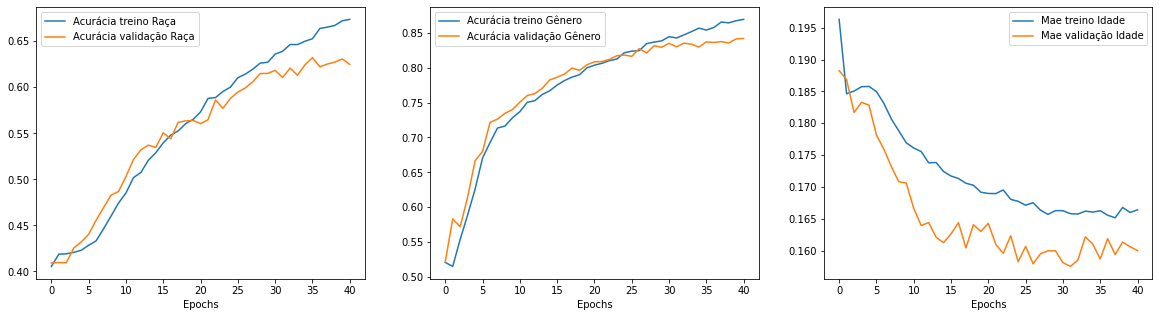

In [21]:
def  plot_history_acuracia(history):
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    axes[0].plot(history.history['saida_raca_accuracy'], label='Acurácia treino Raça')
    axes[0].plot(history.history['val_saida_raca_accuracy'], label='Acurácia validação Raça')
    axes[0].set_xlabel('Epochs')
    axes[0].legend()
    
    axes[1].plot(history.history['saida_genero_accuracy'], label='Acurácia treino Gênero')
    axes[1].plot(history.history['val_saida_genero_accuracy'], label='Acurácia validação Gênero')
    axes[1].set_xlabel('Epochs')
    axes[1].legend()

    axes[2].plot(history.history['saida_idade_mae'], label='Mae treino Idade')
    axes[2].plot(history.history['val_saida_idade_mae'], label='Mae validação Idade')
    axes[2].set_xlabel('Epochs')
    axes[2].legend()  

plot_history_acuracia(history)

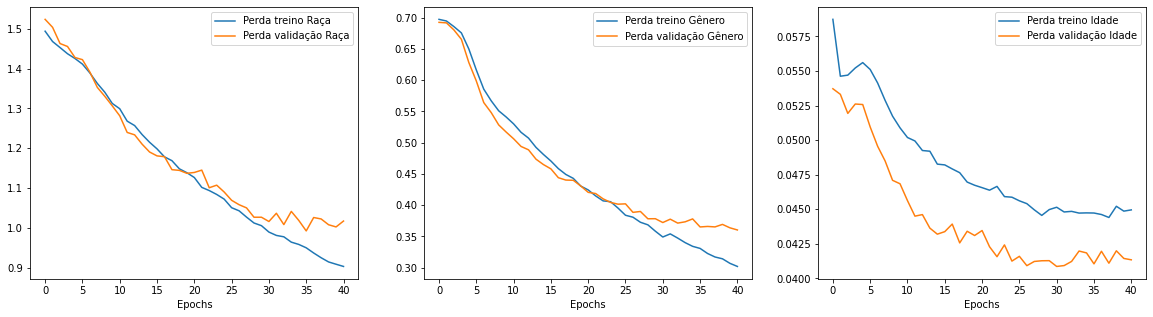

In [22]:
def  plot_history_loss(history):
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    axes[0].plot(history.history['saida_raca_loss'], label='Perda treino Raça')
    axes[0].plot(history.history['val_saida_raca_loss'], label='Perda validação Raça')
    axes[0].set_xlabel('Epochs')
    axes[0].legend()
    
    axes[1].plot(history.history['saida_genero_loss'], label='Perda treino Gênero')
    axes[1].plot(history.history['val_saida_genero_loss'], label='Perda validação Gênero')
    axes[1].set_xlabel('Epochs')
    axes[1].legend()

    axes[2].plot(history.history['saida_idade_loss'], label='Perda treino Idade')
    axes[2].plot(history.history['val_saida_idade_loss'], label='Perda validação Idade')
    axes[2].set_xlabel('Epochs')
    axes[2].legend()  

plot_history_loss(history)

## 7. Teste nos dados de teste

In [23]:
test_gen = gerador_dados(df, indices_teste, treinamento=False, batch_size=128)
dict(zip(model.metrics_names, model.evaluate(test_gen, steps=len(indices_teste)//128)))

55/55 [==============================] - 304s 6s/step - loss: 1.3735 - saida_idade_loss: 0.0417 - saida_raca_loss: 0.9699 - saida_genero_loss: 0.3619 - saida_idade_mae: 0.1609 - saida_raca_accuracy: 0.6422 - saida_genero_accuracy: 0.8378


{'loss': 1.3734843730926514,
 'saida_idade_loss': 0.04168635979294777,
 'saida_raca_loss': 0.9698762893676758,
 'saida_genero_loss': 0.3619214594364166,
 'saida_idade_mae': 0.16091492772102356,
 'saida_raca_accuracy': 0.6421874761581421,
 'saida_genero_accuracy': 0.8377841114997864}

## 8. Relatórios de classificação dos resultados com os dados de teste

In [24]:
test_gen = gerador_dados(df, indices_teste, treinamento=False, batch_size=128)
x_test, (idade_real, raca_real, genero_real)= next(test_gen)
idade_pred, raca_pred, genero_pred = model.predict_on_batch(x_test)

In [25]:
raca_real, genero_real = raca_real.argmax(axis=-1), genero_real.argmax(axis=-1)
raca_pred, genero_pred = raca_pred.argmax(axis=-1), genero_pred.argmax(axis=-1)
idade_real = idade_real * idade_max
idade_pred = idade_pred * idade_max

In [26]:
print("Relatório de classificação para Raça")
print(classification_report(raca_real, raca_pred, zero_division=0))

print("\nRelatório de classificação para Gênero")
print(classification_report(genero_real, genero_pred))


Relatório de classificação para Raça
              precision    recall  f1-score   support

           0       0.66      0.85      0.75        55
           1       0.75      0.75      0.75        24
           2       0.42      0.26      0.32        19
           3       0.67      0.64      0.65        22
           4       0.00      0.00      0.00         8

    accuracy                           0.66       128
   macro avg       0.50      0.50      0.49       128
weighted avg       0.60      0.66      0.62       128


Relatório de classificação para Gênero
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        66
           1       0.85      0.85      0.85        62

    accuracy                           0.86       128
   macro avg       0.86      0.86      0.86       128
weighted avg       0.86      0.86      0.86       128



## 9. Plot dos resultados com os dados de teste

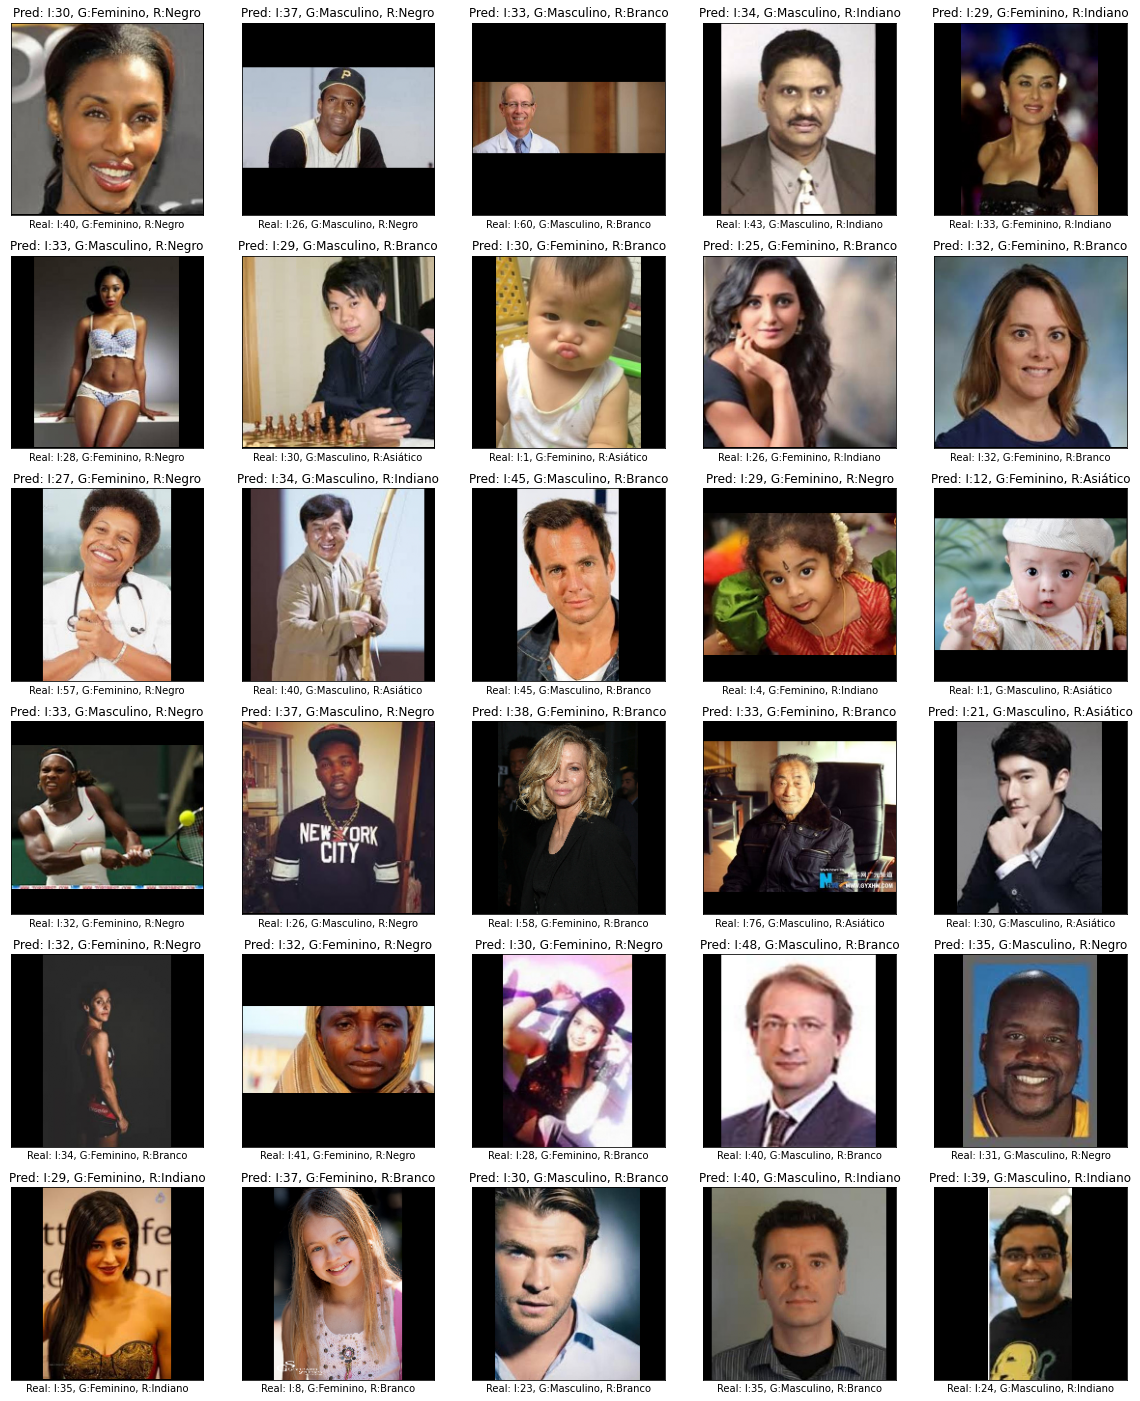

In [27]:

n = 30
random_indices = np.random.permutation(n)
n_cols = 5
n_rows = math.ceil(n / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 25))
for i, img_idx in enumerate(random_indices):
    ax = axes.flat[i]
    ax.imshow(x_test[img_idx])
    ax.set_title('Pred: I:{}, G:{}, R:{}'.format(int(idade_pred[img_idx]), dic_genero[genero_pred[img_idx]], dic_raca[raca_pred[img_idx]]))
    ax.set_xlabel('Real: I:{}, G:{}, R:{}'.format(int(idade_real[img_idx]), dic_genero[genero_real[img_idx]], dic_raca[raca_real[img_idx]]))
    ax.set_xticks([])
    ax.set_yticks([])

## 10. Matriz de confusão para Raça

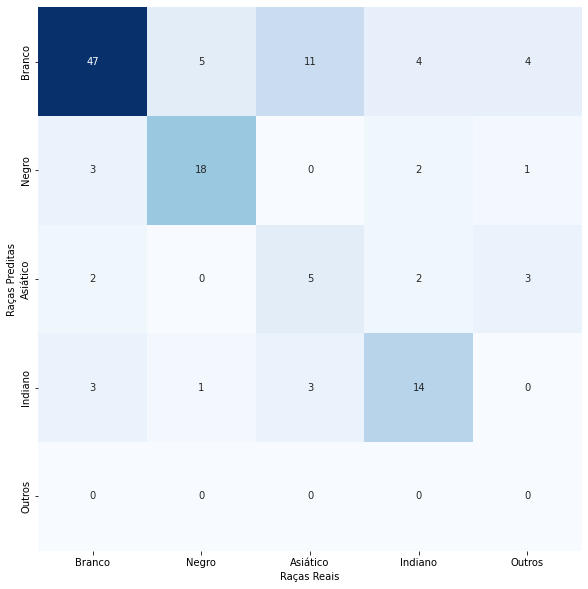

In [28]:
_, ax = plt.subplots(figsize = (15, 10))
mat = confusion_matrix(raca_real, raca_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=list(dic_raca.values()),
            yticklabels=list(dic_raca.values()),cmap=plt.cm.Blues)
plt.xlabel('Raças Reais')
plt.ylabel('Raças Preditas');

## 11. Salvando o modelo

In [30]:
model.save('modelos/')

INFO:tensorflow:Assets written to: modelos/assets
